In [327]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics import mean_squared_error, r2_score
from datetime import date, datetime
import os.path
import json
import requests
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [328]:
from keras.models import load_model
model = load_model('asi_model.h5')

In [329]:
hist = pd.read_csv("batch7.csv")
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'
hist.drop(["conversionType", "conversionSymbol"], axis = 'columns', inplace = True)
hist
batch = 7

In [330]:
def line_plot(line1, label1='test',  title='cos', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

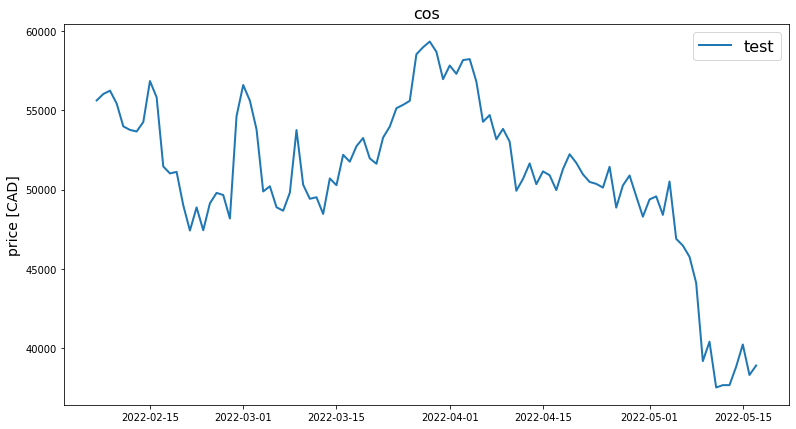

In [331]:
line_plot(hist[target_col],'test')

In [332]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [333]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [334]:
def prepare_data(df, target_col, window_len=5, zero_base=True, test_size=0.2):
    
    X_test = extract_window_data(hist, window_len, zero_base)
    y_test = hist[target_col][window_len:].values
    if zero_base:
        
        y_test = y_test / hist[target_col][:-window_len].values - 1

    return X_test, y_test

In [335]:
x_test,y_test = prepare_data(hist,target_col)
window_len = 5

In [336]:
targets = hist[target_col][window_len:]
preds = model.predict(x_test).squeeze()


3/3 [==============================] - 0s 5ms/step


In [337]:
RMSE = np.sqrt(mean_squared_error(y_test,preds))
RMSE

0.038242825351450564

In [338]:
R2 = r2_score(y_test,preds)
R2

0.6963829897992981

In [339]:
eval_df = pd.DataFrame()
now = datetime.now().strftime("%d-%m-%Y %H:%M:%S")
eval_df = eval_df.append({'time_stamp':now, 'version': '1.0', 'batch': batch, 'metric': 'RMSE', 'score': RMSE}, ignore_index=True)
eval_df = eval_df.append({'time_stamp':now, 'version': '1.0', 'batch': batch, 'metric': 'r2', 'score': R2}, ignore_index=True)
evaluation_file_name = 'model_eval.csv'

if os.path.isfile(evaluation_file_name):
    eval_df.to_csv('model_eval.csv', mode='a', index=False, header=False)
else:
    eval_df.to_csv('model_eval.csv', index=False)

C:\Users\Kacper\AppData\Local\Temp\ipykernel_12420\3295619188.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append({'time_stamp':now, 'version': '1.0', 'batch': batch, 'metric': 'RMSE', 'score': RMSE}, ignore_index=True)
C:\Users\Kacper\AppData\Local\Temp\ipykernel_12420\3295619188.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  eval_df = eval_df.append({'time_stamp':now, 'version': '1.0', 'batch': batch, 'metric': 'r2', 'score': R2}, ignore_index=True)


In [186]:
def line_plot2(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

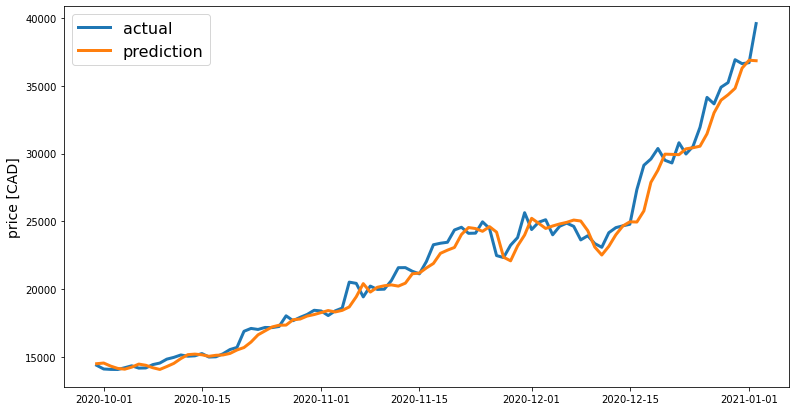

In [187]:
preds = hist[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot2(targets, preds, 'actual', 'prediction', lw=3)

In [188]:
preds

time
2020-09-30    14492.459011
2020-10-01    14542.342015
2020-10-02    14314.863617
2020-10-03    14145.887542
2020-10-04    14088.752600
                  ...     
2020-12-29    34332.760992
2020-12-30    34809.091574
2020-12-31    36299.734863
2021-01-01    36881.974286
2021-01-02    36845.092635
Length: 95, dtype: float64